### Import Libraries

In [484]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import os


### Import Dataset

In [485]:


print("Importing raw dataset...")
dataset = pd.read_csv("/Users/alvina/Desktop/GERMAN-CREDIT-PROCESSOR/https:/github.com/datagirl01/german-credit-processor/data/raw/german_credit.csv")

Importing raw dataset...


### Analyze Dataset

In [310]:

dataset.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


### We are considering the customers with Creditability ==1 and applying K-Means clustering to those samples to anlayze their charcaterstics

In [486]:
# Let X is the customers having creditability ==1 
X = dataset[dataset['Creditability']==1] # Customers with creditabillity 1

### Constraints:
Only numerical data can be used. Generally k-means works best for 2 dimensional numerical data. Visualization is possible in 2d or 3d data. But in reality there are always multiple features to be considered at a time.
Thus multi-dimensional data can be used but dimensionality reduction has to be performed to the data before using it for k-means.

In [312]:
X.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [487]:
# Features we use for clustering (We choose Age and Credit Amount here for clustering)
# Age and credit amount
x = X.iloc[:,[5,13]] # for customers with creditability ==1

### Now we plot a scatterplot. “x” is used to save only the 2 columns that we need from the “data” with all row entries.Next, we plot the scatterplot by setting the figuresize to be 16x9 and style to be ggplot which makes a grid. plt.scatter() plots the 0th column and 1st column of x dataframe with black colored dots and size as 7.

### For Customers with Creditability == 1

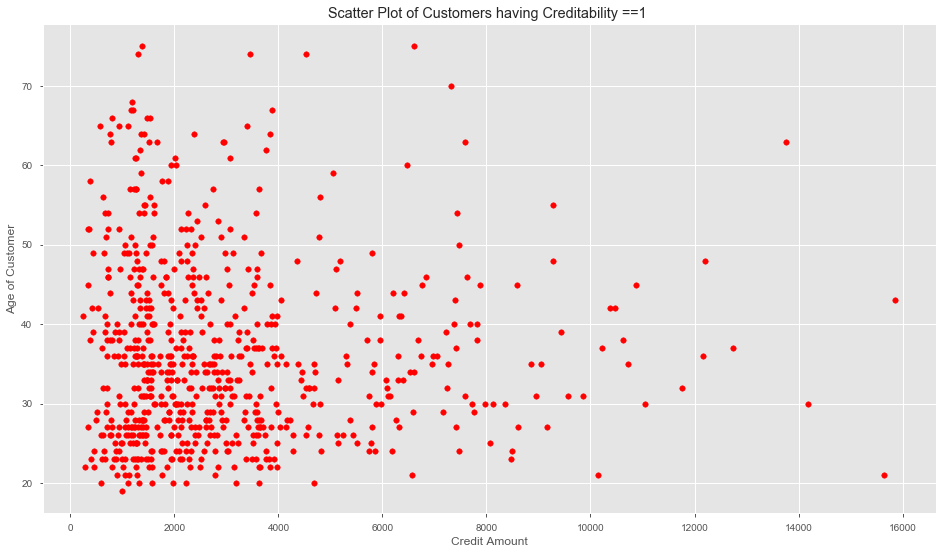

In [488]:
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
plt.scatter(x.iloc[:,0].values,x.iloc[:,1].values,c= "red", s = 30)
plt.title('Scatter Plot of Customers having Creditability ==1 ')
plt.xlabel('Credit Amount')
plt.ylabel('Age of Customer')
plt.show()

## Our initial data looks like this ,unclustered:

### Now we used Elbow Method to find the opitmal number of clusters for X

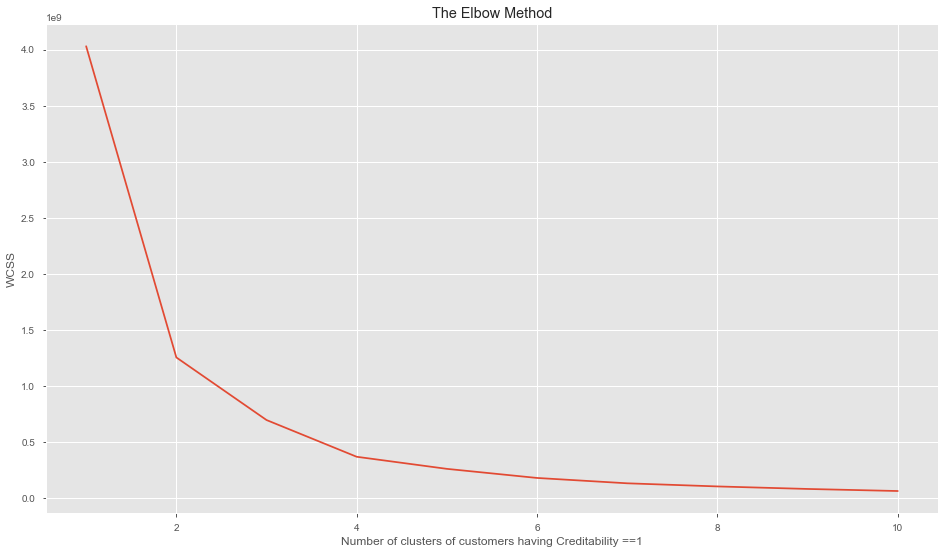

In [489]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters of customers having Creditability ==1')
plt.ylabel('WCSS')
plt.show()

### From the Elbow Method its clear that k = 4.

### Now we perform K-Means clustering for Customers with Creditability ==1

In [490]:
# K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans
X['cluster'] = y_kmeans

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



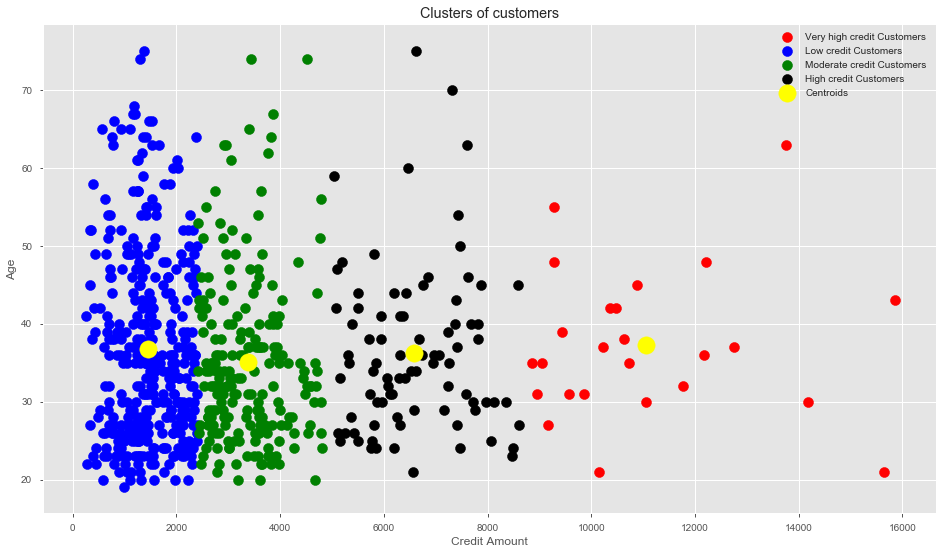

In [491]:
plt.scatter(x.iloc[y_kmeans == 0, 0], x.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Very high credit Customers')
plt.scatter(x.iloc[y_kmeans == 1, 0], x.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low credit Customers')
plt.scatter(x.iloc[y_kmeans == 2, 0], x.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Moderate credit Customers')
plt.scatter(x.iloc[y_kmeans == 3, 0], x.iloc[y_kmeans == 3, 1], s = 100, c = 'black', label = 'High credit Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Amount')
plt.ylabel('Age')
plt.legend()
plt.show()

In [492]:
def getOccupation(entity):
    occ = ""
    if entity == 1:
        occ = "unemployed or unskilled - non-resident"
    elif entity == 2:
        occ = "unskilled - resident"
    elif entity == 3:
        occ = "skilled employee or official"   
    elif entity == 4:
        occ = "management or self-employed or highly qualified employee or officer)"
    return occ    

In [493]:
def setPurposeCategory(purpose):
    category = '';
    if purpose == 0:
        category = "New Car"
    elif purpose == 1:
        category = "Used Car"
    elif purpose == 2:
        category = "Furniture/Equipment"  
    elif purpose == 3:
        category = "Radio/Television"             
    elif purpose == 4:
        category = "Domestic Applicances" 
    elif purpose == 5:
        category = "Repairs"       
    elif purpose == 6:
        category = "Education"
    elif purpose == 7:
        category = "Vacation"  
    elif purpose == 8:
        category = "Retraining"             
    elif purpose == 9:
        category = "Business" 
    elif purpose == 10:
        category = "Others"            
    return category      

In [494]:

def setAccountBalanceCategory(bal):
    category = '';
    if bal == 1:
        category = "< 0 DM"
    elif bal == 2:
        category = "0<=...<200 DM"  
    elif bal == 3:
        category = "> 200 DM"
    elif bal == 4:
        category = "No checking account"           
    return category      

In [495]:
def isCustomerForeignWorker(status):
    value = '';
    if status == 1:
        value  = "Foreign Worker"
    elif status==2:
        value = "Not Foreign Worker"
    return value;    

In [496]:
def getMaritalStatus(status):
    category = '';
    if status == 1:
        category = "male: divorced/separated"
    elif status == 2:
        category = "female: divorced/separated/married"    
    elif status  == 3:
        category = "male: single"             
    elif status  == 4:
        category = "male   : married/widowed" 
    elif status  == 5:
        category = "female : single"
    return category      

    

In [497]:
def getMostValuableAssestCategory(status):
    category = '';
    if status == 1:
        category = "real estate"
    elif status == 2:
        category = "savings agreement/ life insurance"    
    elif status  == 3:
        category = "car"             
    elif status  == 4:
        category = "unknown / no property" 
    return category  

In [498]:
def getClusterType(status):
    category = '';
    if status == 1:
        category = "Low Credit Customers"
    elif status == 2:
        category = "Moderate Credit Customers"    
    elif status  == 3:
        category = "High Credit Customers"             
    elif status  == 0:
        category = "Very High Credit Customers" 
    return category  

In [499]:
def getCreditHistory(status):
    category = '';
    if status == 0:
        category = "no credits taken"
    elif status == 1:
        category = "all credits at this bank paid back duly"    
    elif status  == 2:
        category = "existing credits payed back duly till now"      
    elif status  == 3:
        category = "delay in paying off in the past"             
    elif status  == 4:
        category = "critical account" 
    return category  

In [500]:
def getGuarantorStatus(status):
    category = '';
    if status == 1:
        category = "None"
    elif status == 2:
        category = "co-applican"    
    elif status  == 3:
        category = "guarantor"      
    return category  

In [501]:
def getEmploymentLength(status):
    category = '';
    if status == 1:
        category = "unemployed"
    elif status == 2:
        category = "Less than 1 Year"    
    elif status  == 3:
        category = "1 to 4 Years" 
    elif status  == 4:
        category = "4 to 7 Years" 
    elif status  == 5:
        category = "Greater than 7 Years" 
    return category  

In [502]:
def getApartmentType(status):
    category = '';
    if status == 1:
        category = "rent"
    elif status == 2:
        category = "own"    
    elif status  == 3:
        category = "for free" 
    return category  

In [503]:
X[X["cluster"]==0]["Credit Amount"].unique()

array([10875,  8858, 12749, 12169, 10722, 10366,  9436, 10477, 13756,
       11760, 14179,  9566,  9857, 10222,  9055, 12204, 10623,  9277,
       15857, 10144, 15653,  8947, 11054,  9157,  9283])

In [504]:
X[X["cluster"]==3]["Credit Amount"].unique()

array([6187, 7582, 7228, 6614, 6313, 5866, 6361, 5954, 7432, 6260, 5842,
       5103, 5084, 5771, 5848, 8072, 5742, 8487, 7253, 6761, 7824, 7721,
       8613, 8588, 5248, 6204, 5711, 7678, 8133, 5152, 6070, 7629, 5045,
       6568, 7758, 5965, 6742, 7393, 5511, 6403, 6078, 5381, 7166, 5804,
       5117, 7308, 5743, 7418, 6468, 7374, 7472, 5324, 7409, 5190, 5801,
       7814, 6842, 5150, 6967, 8358, 5433, 7966, 6948, 5302, 5371, 6579,
       6314, 6615, 7882, 6289, 6419, 7238, 6681, 7057, 5800, 8471, 6110,
       6304, 7476, 6527, 5493, 6148, 7596, 5507])

In [505]:
X[X["cluster"]==2]["Credit Amount"].unique()

array([2799, 3398, 3758, 3905, 2647, 3939, 3213, 3676, 3124, 4716, 4771,
       3556, 4796, 3017, 3535, 3378, 3868, 2825, 3919, 3160, 3079, 2679,
       3578, 3077, 2745, 3399, 3275, 3342, 3651, 4454, 2991, 4221, 4526,
       3573, 3777, 4712, 3976, 2603, 3062, 4795, 2978, 2872, 2515, 3148,
       3835, 3832, 2476, 2964, 3512, 2684, 3617, 3972, 3343, 2788, 3235,
       4139, 2831, 3430, 2923, 3711, 3609, 3763, 4439, 2753, 2828, 2483,
       3949, 2901, 3656, 4679, 2659, 4380, 3566, 3857, 2569, 3488, 4151,
       2631, 2899, 3595, 2687, 3643, 3448, 2708, 2675, 2835, 2670, 3447,
       3568, 3652, 3660, 4675, 3357, 2697, 2507, 3565, 3749, 3074, 2606,
       2751, 3016, 2662, 2848, 3632, 3229, 3577, 2924, 2759, 3021, 2578,
       3416, 3650, 3599, 4041, 2812, 3029, 2528, 3181, 4594, 4657, 2743,
       3195, 4530, 2442, 3590, 4686, 3973, 2629, 2445, 3812, 4473, 3422,
       3105, 2748, 3872, 3001, 3863, 3780, 3612, 3527, 3331, 3104, 2611,
       4042, 2463, 3878, 3186, 2896, 2930, 3380, 32

In [506]:
X.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker', 'cluster'],
      dtype='object')

In [507]:
X['occupation_category'] = X["Occupation"].apply(getOccupation)
X['acc_bal_category'] = X["Account Balance"].apply(setAccountBalanceCategory)
X['foreign_worker_category'] = X["Foreign Worker"].apply(isCustomerForeignWorker)
X['purpose_category'] = X["Purpose"].apply(setPurposeCategory)
X['marital_status'] = X["Sex & Marital Status"].apply(getMaritalStatus)
X['most_valuable_assest_category'] = X["Most valuable available asset"].apply(getMostValuableAssestCategory)
X['credit_category'] = X["cluster"].apply(getClusterType)
X['credit_history_type'] = X["Payment Status of Previous Credit"].apply(getCreditHistory)
X['used_gurantor'] = X["Guarantors"].apply(getGuarantorStatus)
X['current_employement_length'] = X["Length of current employment"].apply(getEmploymentLength)
X['apartment_type'] = X["Type of apartment"].apply(getApartmentType)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

# ANALYZING CLUSTERING RESULTS

In [508]:
fig = px.histogram(X, title='Distribution of Customers with Credit Amount', x="credit_category", color="credit_category")
fig.show()

# Analyzing characteristics of Very High Credit Customers

In [509]:
HIGH_CREDIT_CUSTOMERS = X[X["cluster"]==3]

In [510]:
fig = px.histogram(HIGH_CREDIT_CUSTOMERS, title='Account Balances of Customers with Very High Credit', x="acc_bal_category", color="Account Balance")
fig.show()

#### We can see that a high number of customers who doesnt have a Checking Account has Very Hight Credit Amount and Creditabilty.

### We can analyze those customers having No checking account but secured a very high credit

In [511]:
 HIGH_CREDIT_CUSTOMERS_WORK_CATEGORY = X[(X["cluster"]==3) & (X["Account Balance"]==4)]

In [512]:
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_WORK_CATEGORY, title='Work Category of Customers with Very High Credit having No Checking Account', x="foreign_worker_category", color="Account Balance")
fig.show()

### From the histogram its clear that most of the customers who secured a very high credit without a checking account are Foreign Workers

In [513]:
 HIGH_CREDIT_CUSTOMERS_WITH_DM_GREATER_THAN_200 = X[(X["cluster"]==3) & (X["Account Balance"]==3)]

In [514]:
HIGH_CREDIT_CUSTOMERS_WITH_DM_GREATER_THAN_200

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,acc_bal_category,foreign_worker_category,purpose_category,marital_status,most_valuable_assest_category,credit_category,credit_history_type,used_gurantor,current_employement_length,apartment_type
170,1,3,36,2,3,5848,1,3,4,3,...,> 200 DM,Foreign Worker,Radio/Television,male: single,car,High Credit Customers,existing credits payed back duly till now,None,1 to 4 Years,own
301,1,3,24,2,3,5152,1,4,4,3,...,> 200 DM,Foreign Worker,Radio/Television,male: single,car,High Credit Customers,existing credits payed back duly till now,None,4 to 7 Years,own
641,1,3,42,0,9,6289,1,2,2,1,...,> 200 DM,Foreign Worker,Business,male: divorced/separated,savings agreement/ life insurance,High Credit Customers,no credits taken,None,Less than 1 Year,own


In [515]:
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_WITH_DM_GREATER_THAN_200, title='Occupation of Customers with Very High Credit and Account Balance > 200 DM', x="occupation_category", color="foreign_worker_category")
fig.show()

### ALL of the customers who secured a very high credit and have checking account balance > 200 DM are Skilled Employee or Official having a Foreign Worker Status

In [516]:
HIGH_CREDIT_CUSTOMERS_OCCUPATION_CATEGORY = X[(X["cluster"]==3)]

In [517]:
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_OCCUPATION_CATEGORY, title='Occupation of Customers with Very High Credit', x="occupation_category")
fig.show()

In [518]:
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_OCCUPATION_CATEGORY, title='Age of Customers with Very High Credit', x="Age (years)")
fig.show()

### It's clear that customers of Age Group 30-34 have secured very high credits

In [519]:
HIGH_CREDIT_CUSTOMERS_30_34_AGE_OCCUPATION_CATEGORY = X[(X["cluster"]==3) & ((X["Age (years)"]>=30) & (X["Age (years)"]<=34))]
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_30_34_AGE_OCCUPATION_CATEGORY, title='Occupation of Customers having Very High Credit and Age between 30 and 34', x="occupation_category", color="foreign_worker_category")
fig.show()

In [520]:
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_30_34_AGE_OCCUPATION_CATEGORY, title='Occupation of Customers having Very High Credit and Age between 30 and 34', x="occupation_category", color="foreign_worker_category")
fig.show()

### Majority of the Very High Credit Customers between Age 30 and 34 are Skilled Employee or Official having Foreign Worker Status

In [521]:
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_30_34_AGE_OCCUPATION_CATEGORY, title='Purpose for which Customers having Very High Credit and Age between 30 and 34 used Credit for', x="purpose_category", color= "foreign_worker_category")
fig.show()

### In the Very High Credit Customers who are native to Germany used high credit only for buying Furniture/Equiupment

### In the Very High Credit  Customers used credit amount to buy either New or Used car and all of them are Foreign Workers

In [522]:
HIGH_CREDIT_CUSTOMERS_30_34_AGE_PURPOSE_CAR = X[(X["cluster"]==3) & ((X["Age (years)"]>=30) & (X["Age (years)"]<=34)) &  ((X["Purpose"]==0) | (X["Purpose"]==1))]
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_30_34_AGE_OCCUPATION_CATEGORY, title='Marital Status of Customers having Very High Credit and Age (30-34) used Credit for Buying Used/New car', x="marital_status", color="foreign_worker_category" "")
fig.show()

### Majority of Very High Credit Customers are foreign worker - males having Marital Status SINGLE.

In [523]:
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_OCCUPATION_CATEGORY, title='Purpose for which Very High Credit Customers applied Credit for', x="purpose_category")
fig.show()

In [524]:
HIGH_CREDIT_CUSTOMERS_30_34_AGE_PURPOSE_CAR = X[(X["cluster"]==3) & ((X["Age (years)"]>=30) & (X["Age (years)"]<=34))]
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_30_34_AGE_OCCUPATION_CATEGORY, title='Marital Status of Customers having Very High Credit and Age (30-34) used Credit for Buying Used/New car', x="Value Savings/Stocks")
fig.show()

In [525]:
HIGH_CREDIT_CUSTOMERS_30_34_AGE_PURPOSE_CAR = X[(X["cluster"]==3) & ((X["Age (years)"]>=30) & (X["Age (years)"]<=34))]
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_30_34_AGE_OCCUPATION_CATEGORY, title='Credit History of Customers having Very High Credit and Age (30-34) used Credit for Buying Used/New car', x="credit_history_type")
fig.show()

In [526]:
HIGH_CREDIT_CUSTOMERS_30_34_AGE_PURPOSE_CAR = X[(X["cluster"]==3) & ((X["Age (years)"]>=30) & (X["Age (years)"]<=34))]
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_30_34_AGE_PURPOSE_CAR, title='Most Valuable Assests of Customers having Very High Credit and Age (30-34)', x="most_valuable_assest_category")
fig.show()

In [527]:
fig = px.histogram(HIGH_CREDIT_CUSTOMERS, title='Credit History of Customers having Very High Credit', x="credit_history_type")
fig.show()

# Analyzing characteristics of Low Credit Customers

In [528]:
LOW_CREDIT_CUSTOMERS = X[X["cluster"]==1]

In [529]:
fig = px.histogram(LOW_CREDIT_CUSTOMERS, title='Credit History of Customers having Low Credit', x="credit_history_type")
fig.show()

In [530]:
fig = px.histogram(LOW_CREDIT_CUSTOMERS, title='Purpose for which Low Credit Amount Customers got approval', x="purpose_category")
fig.show()

In [531]:
fig = px.histogram(LOW_CREDIT_CUSTOMERS, title='Account Balance of Customers having Low Credit', x="acc_bal_category", color= "acc_bal_category")
fig.show()

In [399]:
X.columns 

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker', 'cluster', 'occupation_category',
       'acc_bal_category', 'foreign_worker_category', 'purpose_category',
       'marital_status', 'most_valuable_assest_category', 'credit_category',
       'credit_history_type'],
      dtype='object')

In [421]:
LOW_CREDIT_CUSTOMERS_WORK_CATEGORY = X[(X["cluster"]==1) & (X["Account Balance"]==4)]
fig = px.histogram(LOW_CREDIT_CUSTOMERS_WORK_CATEGORY, title='Work Category of Customers with Low Credit having No Checking Account', x="foreign_worker_category", color= "foreign_worker_category")
fig.show()

In [422]:
fig = px.histogram(LOW_CREDIT_CUSTOMERS, title='Occupation of Customers with Low Credit', x="occupation_category")
fig.show()

In [423]:
fig = px.histogram(LOW_CREDIT_CUSTOMERS, title='Age of Customers with Low Credit', x="Age (years)")
fig.show()

In [426]:
LOW_CREDIT_CUSTOMERS_25_29_AGE_OCCUPATION_CATEGORY = X[(X["cluster"]==1) & ((X["Age (years)"]>=25) & (X["Age (years)"]<=29))]
fig = px.histogram(LOW_CREDIT_CUSTOMERS_25_29_AGE_OCCUPATION_CATEGORY, title='Occupation of Customers having Low Credit and Age between 25 and 29', x="occupation_category", color="foreign_worker_category")
fig.show()

In [425]:
fig = px.histogram(LOW_CREDIT_CUSTOMERS_25_29_AGE_OCCUPATION_CATEGORY, title='Purpose for which Customers having Low Credit and Age between 25 and 29 used Credit for', x="purpose_category", color= "foreign_worker_category")
fig.show()

In [428]:
HIGH_CREDIT_CUSTOMERS_25_34_AGE_PURPOSE_CAR = X[(X["cluster"]==1) & ((X["Age (years)"]>=25) & (X["Age (years)"]<=29)) &  ((X["Purpose"]==0) | (X["Purpose"]==1))]
fig = px.histogram(HIGH_CREDIT_CUSTOMERS_30_34_AGE_OCCUPATION_CATEGORY, title='Marital Status of Customers having Low Credit and Age (25-29) used Credit for Buying Used/New car', x="marital_status", color="foreign_worker_category" "")
fig.show()

In [429]:
LOW_CREDIT_CUSTOMERS_25_29_AGE = X[(X["cluster"]==1) & ((X["Age (years)"]>=25) & (X["Age (years)"]<=29))]
fig = px.histogram(LOW_CREDIT_CUSTOMERS_25_29_AGE, title='Most Valuable Assests of Customers having Low Credit and Age (25-29)', x="most_valuable_assest_category")
fig.show()

In [462]:
X.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker', 'cluster', 'occupation_category',
       'acc_bal_category', 'foreign_worker_category', 'purpose_category',
       'marital_status', 'most_valuable_assest_category', 'credit_category',
       'credit_history_type', 'used_gurantor', 'current_employement_length'],
      dtype='object')

In [465]:
LOW_CREDIT_CUSTOMERS = X[(X["cluster"]==1)]
fig = px.histogram(LOW_CREDIT_CUSTOMERS, title='Employment Length of Customers having Low Credit', x="current_employement_length")
fig.show()

In [466]:
HIGH_CREDIT_CUSTOMERS = X[(X["cluster"]==3)]
fig = px.histogram(HIGH_CREDIT_CUSTOMERS, title='Employment Length of Customers having Very High Credit', x="current_employement_length")
fig.show()

In [470]:
LOW_CREDIT_CUSTOMERS = X[(X["cluster"]==1)]
fig = px.histogram(LOW_CREDIT_CUSTOMERS, title='Duration Of Credit of Customers having Low Credit', x="Duration of Credit (month)")
fig.show()

In [471]:
LOW_CREDIT_CUSTOMERS = X[(X["cluster"]==3)]
fig = px.histogram(LOW_CREDIT_CUSTOMERS, title='Duration Of Credit of Customers having Very High Credit', x="Duration of Credit (month)")
fig.show()

In [481]:
LOW_CREDIT_CUSTOMERS = X[(X["cluster"]==1)]
fig = px.histogram(LOW_CREDIT_CUSTOMERS, title='Apartment Type of Customers having Low Credit', x="apartment_type")
fig.show()

In [483]:
LOW_CREDIT_CUSTOMERS = X[(X["cluster"]==3)]
fig = px.histogram(LOW_CREDIT_CUSTOMERS, title='Apartment Type of Customers having Very High Credit', x="apartment_type")
fig.show()